In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DLALS/Aggregation_k=7.txt',sep='\t',header=None)

In [ ]:
X=df[0]
Y=df[1]
classes =set(df[2])

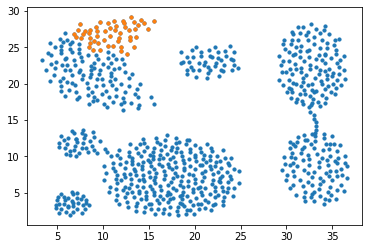

In [ ]:
plt.scatter(X,Y,s=10)
plt.scatter(X[:52],Y[:52],s=10)

**MST OF TOP 52 DATAPOINTS**

In [ ]:
data=df.iloc[:,:-1]

In [ ]:
#euclidean distance that will act as edge weights
def distance(a,b):
  return (math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2))

In [ ]:
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self): 
        result =[] 
        i = 0
        e = 0 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
        parent = {} ; rank = {} 
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            if x != y: 
                e = e + 1     
                result.append([u,v]) 
                self.union(parent, rank, x, y)

        return result
#51 PROBABLE CENTERS ALIAS NAMES : 
vertices = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','A1', 'B1', 'C1', 'D1', 'E1','F1','G1','H1','I1','J1','K1','L1','M1','N1','O1','P1','Q1','R1','S1','T1','U1','V1','W1','X1','Y1']
N = 51
g = Graph(N, vertices)
for i in range(N):
  for j in range(N):
    g.addEdge(vertices[i],vertices[j],distance(data.iloc[i],data.iloc[j]))
MST = g.KruskalMST()
print(MST)


[['L', 'M'], ['L1', 'M1'], ['Q1', 'R1'], ['N1', 'O1'], ['U1', 'V1'], ['Z', 'A1'], ['M1', 'N1'], ['U1', 'W1'], ['C', 'D'], ['B1', 'D1'], ['E1', 'F1'], ['O', 'P'], ['K', 'L'], ['I1', 'J1'], ['E', 'F'], ['O1', 'S1'], ['T', 'U'], ['R1', 'S1'], ['X1', 'Y1'], ['R', 'T'], ['V1', 'X1'], ['E', 'H'], ['T1', 'U1'], ['J', 'K'], ['H1', 'I1'], ['H', 'J'], ['Q', 'Z'], ['U', 'X'], ['U', 'V'], ['I', 'P'], ['Q', 'T'], ['R', 'S'], ['J1', 'L1'], ['P1', 'Q1'], ['M1', 'T1'], ['C', 'E'], ['G1', 'W1'], ['F', 'G'], ['W', 'J1'], ['B1', 'E1'], ['C1', 'D1'], ['V', 'W'], ['J', 'P'], ['X', 'Y'], ['A1', 'E1'], ['K1', 'P1'], ['B', 'C'], ['N', 'O'], ['J', 'Q'], ['A', 'C']]


In [ ]:
#indexes are here , which probable center connected with which we can find it easily now:
indexing=[]
for i in MST:
  a=vertices.index(i[0])
  b=vertices.index(i[1])
  indexing.append([a,b])
print(indexing)



[[11, 12], [37, 38], [42, 43], [39, 40], [46, 47], [25, 26], [38, 39], [46, 48], [2, 3], [27, 29], [30, 31], [14, 15], [10, 11], [34, 35], [4, 5], [40, 44], [19, 20], [43, 44], [49, 50], [17, 19], [47, 49], [4, 7], [45, 46], [9, 10], [33, 34], [7, 9], [16, 25], [20, 23], [20, 21], [8, 15], [16, 19], [17, 18], [35, 37], [41, 42], [38, 45], [2, 4], [32, 48], [5, 6], [22, 35], [27, 30], [28, 29], [21, 22], [9, 15], [23, 24], [26, 30], [36, 41], [1, 2], [13, 14], [9, 16], [0, 2]]


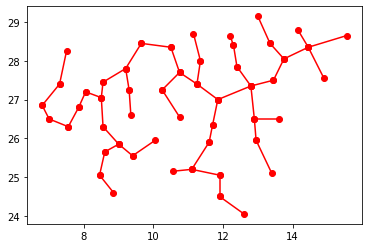

In [ ]:
mst_plot_x=[]
mst_plot_y=[]
for i in indexing:
  mst_plot_x.extend([data.iloc[i[0]][0]])
  mst_plot_x.extend([data.iloc[i[1]][0]])
  mst_plot_y.extend([data.iloc[i[0]][1]])
  mst_plot_y.extend([data.iloc[i[1]][1]])
plt.scatter(X[:51],Y[:51],color='black',s=10)
for i in range(51):
  plt.scatter(data.iloc[i][0],data.iloc[i][1],color='red',s=70,marker='.')
# plt.plot(mst_plot_x,mst_plot_y)
for i in range(0, len(mst_plot_x), 2):
    plt.plot(mst_plot_x[i:i+2], mst_plot_y[i:i+2], 'ro-')

0.26925824035672574
0.4031128874149261
0.4031128874149288
0.44721359549995715
0.44721359549995954
0.4609772228646471
0.4743416490252558
0.5000000000000007
0.5408326913195972
0.5500000000000007
0.552268050859362
0.5522680508593636
0.5590169943749446
0.5590169943749483
0.5656854249492372
0.58309518948453
0.5830951894845304
0.5852349955359809
0.6020797289396145
0.6082762530298234
0.6184658438426471
0.6264982043070844
0.6363961030678917
0.6403124237432851
0.6519202405202634
0.667083203206315
0.6670832032063154
0.672681202353685
0.6964194138592079
0.6999999999999993
0.7211102550927968
0.7280109889280509
0.7382411530116695
0.7433034373659232
0.7516648189186454
0.7615773105863904
0.7632168761236869
0.7826237921249256
0.7905694150420943
0.8139410298049857
0.8321658488546609
0.8558621384311839
0.8558621384311859
0.8602325267042621
0.8602325267042621
0.8732124598286504
0.9178779875342921
0.9617692030835658
1.0124228365658308
1.1401754250991385


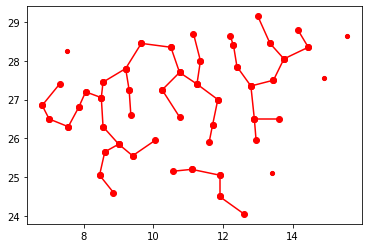

In [ ]:
for i in indexing:
  print(distance(data.iloc[i[0]],data.iloc[i[1]]))
#last k-1 nodes gives longest edges removing that
plt.scatter(X[:51],Y[:51],color='black',s=10)
for i in range(51):
  plt.scatter(data.iloc[i][0],data.iloc[i][1],color='red',s=70,marker='.')
#removing k-1 = 6 edges, plot we get is :
for i in range(0, len(mst_plot_x)-12, 2):
    plt.plot(mst_plot_x[i:i+2], mst_plot_y[i:i+2], 'ro-')